In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size=4>Past method is more manual and resource consuming; it involved filtering the dates for consecutive seven-day periods, then performing calculations on those groups with a nested for loop.

New method uses .rolling() to gain more, clearer information more efficiently; instead of weeks, we display a rolling seven-day average.</font>

In [2]:
# read in the raw data
new_cases = pd.read_csv("resources/covid19cases_test.csv")
new_cases

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42268,2021-12-20,Yuba,County,79290.0,10.0,10678.0,0.0,73.0,292.0,128766,16.0,12446,10.0,10656.0,0.0,97.0,184.0
42269,2021-12-21,Yuba,County,79290.0,11.0,10689.0,0.0,73.0,180.0,128946,14.0,12460,12.0,10668.0,1.0,98.0,168.0
42270,2021-12-22,Yuba,County,79290.0,3.0,10692.0,0.0,73.0,78.0,129024,4.0,12464,13.0,10681.0,0.0,98.0,247.0
42271,2021-12-23,Yuba,County,79290.0,0.0,10692.0,0.0,73.0,NaN,129024,NaN,12464,13.0,10694.0,0.0,98.0,313.0


<font size="5">Data Cleaning</font>

In [3]:
# new df with filtered for relevant columns
data = new_cases[["area", "cases", "deaths", "date", "population"]]

# columns renamed
data.columns = ["county", "cases", "deaths", "date", "population"]

# drop rows with nan values
data = data.dropna()

# sort df by the date column, ascending
data = data.sort_values("date")

# create a clean dataframe, filtering out rows that have irrelevant column values
clean_cases = data.loc[ (data["county"] != "Unknown") & (data["county"] != "Out of state")]

# create a list of counties for later iteration
counties = clean_cases["county"].unique().tolist()

In [4]:
clean_cases

,county,cases,deaths,date,population
0,Alameda,3.0,0.0,2020-02-01,1685886.0
6930,Fresno,0.0,0.0,2020-02-01,1032227.0
4158,Colusa,0.0,0.0,2020-02-01,22593.0
14553,Marin,0.0,0.0,2020-02-01,260800.0
18018,Mono,0.0,0.0,2020-02-01,13961.0
...,...,...,...,...,...
8314,Glenn,0.0,0.0,2021-12-23,29348.0
33262,Sierra,0.0,0.0,2021-12-23,3115.0
7621,Fresno,0.0,0.0,2021-12-23,1032227.0
27718,San Francisco,0.0,0.0,2021-12-23,892280.0


<font size=5>Loop through counties and apply .rolling() and per capita calculations</font>

In [5]:
# create empty dataframe; the new df will contain all calculations
column_names = ["county", "cases", "deaths", "date", "population", "average_cases",
                "cases_per_cap", "average_deaths", "deaths_per_cap"]
weekly_df = pd.DataFrame(columns = column_names)
weekly_df

,county,cases,deaths,date,population,average_cases,cases_per_cap,average_deaths,deaths_per_cap


In [6]:
# loop through counties, apply seven-day rolling window and calculations
# append results to empty dataframe

for county in counties:
    
    # filter dataframe for a given county
    df = clean_cases.loc[clean_cases["county"] == county]
    # reset the index
    df = df.reset_index(drop=True)
    
    # apply .rolling() to create a column of seven-day averages
    df["average_cases"] = df.cases.rolling(window=7).mean()
    # create another new column with per capita calculation applied
    df["cases_per_cap"] = round((df["average_cases"]/df["population"]) * 100000, 3)
    
    # same operations for average deaths and average per capita deaths
    df["average_deaths"] = df.deaths.rolling(window=7).mean()
    df["deaths_per_cap"] = round((df["average_deaths"]/df["population"]) * 100000, 3)
    
    # append temporary dataframe with calculations to our final dataframe
    weekly_df = weekly_df.append(df)
    
# display results
weekly_df

,county,cases,deaths,date,population,average_cases,cases_per_cap,average_deaths,deaths_per_cap
0,Alameda,3.0,0.0,2020-02-01,1685886.0,NaN,NaN,NaN,NaN
1,Alameda,0.0,0.0,2020-02-02,1685886.0,NaN,NaN,NaN,NaN
2,Alameda,0.0,0.0,2020-02-03,1685886.0,NaN,NaN,NaN,NaN
3,Alameda,0.0,0.0,2020-02-04,1685886.0,NaN,NaN,NaN,NaN
4,Alameda,0.0,0.0,2020-02-05,1685886.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
687,Santa Clara,152.0,1.0,2021-12-19,1967585.0,227.714286,11.573,0.857143,0.044
688,Santa Clara,540.0,0.0,2021-12-20,1967585.0,270.142857,13.730,0.571429,0.029
689,Santa Clara,323.0,0.0,2021-12-21,1967585.0,281.714286,14.318,0.428571,0.022
690,Santa Clara,87.0,0.0,2021-12-22,1967585.0,256.142857,13.018,0.428571,0.022


<font size="5">Sample Plots</font>

In [7]:
# store oldest and newest dates
first_date = weekly_df.date[0]
last_date = weekly_df.date.unique().tolist()[-1]

In [ ]:
# create function that plots a given county against california
def county_plot(county):
    
    county_df = weekly_df.loc[weekly_df.county == county]
    county_df = county_df.fillna(0)
    
    dates = county_df.date.unique().tolist()
    county_cases = county_df.cases.tolist()
    county_cases_rolling = county_df.average_cases.tolist()
    
    cases_line, = plt.plot(dates, county_cases, color="blue", label="Daily Cases")
    rolling_line, = plt.plot(dates, county_cases_rolling, color="thistle", label="7-day Average")
    plt.figure(figsize=(8, 6))
    plt.title(f"COVID-19 Cases for {county} County")
    plt.xlabel(f"{first_date} - {last_date}")
    plt.ylabel("New COVID-19 Cases")
    plt.legend(handles=[cases_line, rolling_line], loc="best")
    
    #plt.xticks(dates[::14], rotation="45")
    plt.tight_layout()
    plt.show()

In [8]:
county_df = weekly_df.loc[weekly_df.county == "Alameda"]
county_df = county_df.fillna(0)

dates = county_df.date.unique().tolist()
county_cases = county_df.cases.tolist()
county_cases_rolling = county_df.average_cases.tolist()

In [9]:
county_df = county_df[["date", "cases", "average_cases"]]
county_df = county_df.set_index("date")
county_df.rename_axis(None, inplace=True)

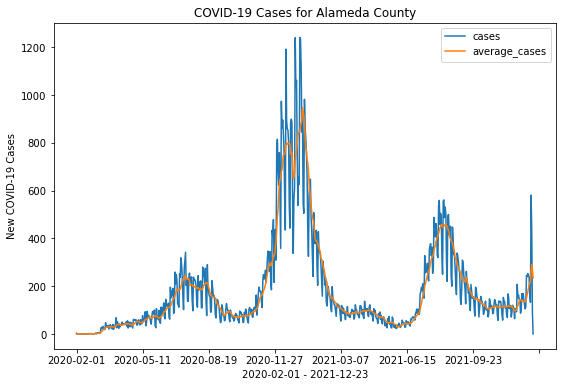

In [16]:
county_df.plot(figsize=(9,6))
plt.title(f"COVID-19 Cases for Alameda County")
plt.xlabel("2020-02-01 - 2021-12-23")
plt.ylabel("New COVID-19 Cases")
plt.show()

In [11]:
county_df

,cases,average_cases
2020-02-01,3.0,0.000000
2020-02-02,0.0,0.000000
2020-02-03,0.0,0.000000
2020-02-04,0.0,0.000000
2020-02-05,0.0,0.000000
...,...,...
2021-12-19,133.0,216.857143
2021-12-20,581.0,264.857143
2021-12-21,432.0,292.285714
2021-12-22,94.0,269.571429


<font size="5">Export as JSON</font>

In [ ]:
import os, json, uuid

In [ ]:
# use .to_dict and 'records' orient to make our desired list
# can be used as 'data.js', or .insert_many with PyMongo
list_d = weekly_df.to_dict(orient='records')

In [ ]:
# write to a text file for our data.js later
with open("rolling_dict.txt", "w") as file:
    file.write(json.dumps(list_d))

In [ ]:
weekly_df.to_json('weekly_df.json', orient='records')